# Quickstart

A minimal example for rotational mapping with `spectralmap`.

In [40]:
import numpy as np
from spectralmap.mapping import make_map
import matplotlib.pyplot as plt

In [82]:
m_rot = make_map(mode="rotational", ydeg=2, inc=90, map_res=30)
theta = np.linspace(0, 360, 200)
y = np.ones_like(theta) + 0.01 * np.cos(np.radians(theta)) + 0.01 * np.cos(2 * np.radians(theta)) + 0.01 * np.cos(np.radians(theta)+np.pi/2)
sigma = np.full_like(theta, 1e-3)
y = y + np.random.normal(scale=sigma, size=y.shape)

Pre-computing some matrices... Done.


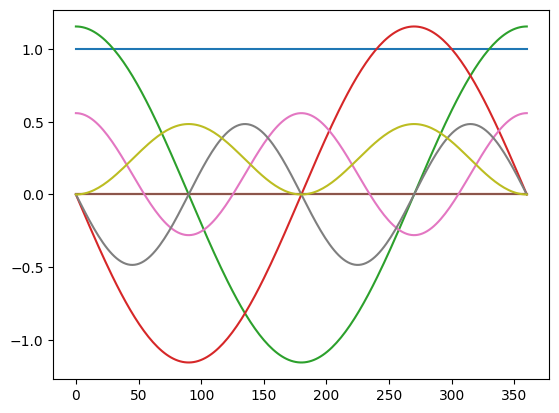

In [83]:
plt.plot(theta, m_rot.design_matrix(theta))

In [84]:
mean, cov, log_ev = m_rot.solve_posterior(
    y=y,
    sigma_y=sigma,
    theta=theta,
    lambda_fix=1.0,
)

Compiling `compute_rect_grid`... Done.


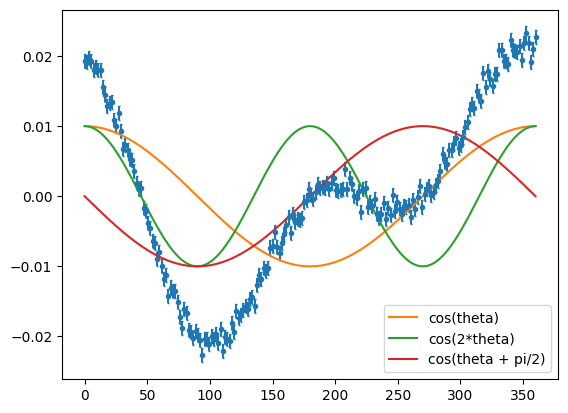

In [104]:
plt.errorbar(theta, m_rot.flux - 1, m_rot.flux_err, fmt='.', capsize=1)
plt.plot(theta, 0.01 * np.cos(np.radians(theta)), label='cos(theta)')
plt.plot(theta, 0.01 * np.cos(2 * np.radians(theta)), label='cos(2*theta)')
plt.plot(theta, 0.01 * np.cos(np.radians(theta)+np.pi/2), label='cos(theta + pi/2)')
plt.legend()

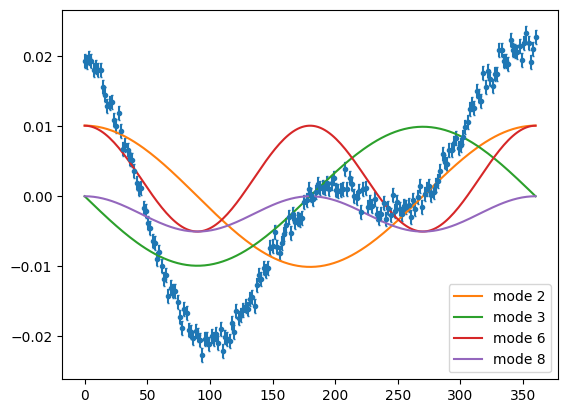

In [105]:
plt.errorbar(theta, m_rot.flux - 1, m_rot.flux_err, fmt='.', capsize=1)
for i in range(2, len(mean)):
    if abs(mean[i]) > 1e-3:
        plt.plot(theta, m_rot.design_matrix(theta)[:, i] * mean[i], label=f"mode {i}")
plt.legend()

Compiling `render`... Done.


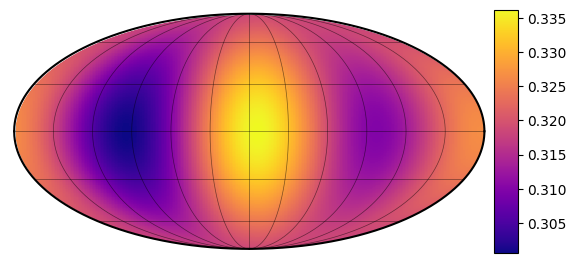

In [106]:
m_rot.show(projection="mollweide", colorbar=True)